In [153]:
#import necessary librariies
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [154]:
df_train=pd.read_csv("G:/Twitter analysis/train_E6oV3lV.csv")
df_test=pd.read_csv("G:/Twitter analysis/test_tweets_anuFYb8.csv")
subm=pd.read_csv("G:/Twitter analysis/sample_submission_gfvA5FD.csv")

In [155]:
df_train.shape ,df_test.shape ,subm.shape

((31962, 3), (17197, 2), (17197, 2))

In [156]:
#from the above data we can say , dependent variable is classified, so we apply classification algorithm

In [157]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [158]:
# 0 indicates--not hate speech
#1 hate speech
df_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [159]:
#here we can see that dependent and independent variables
#X(independent)--tweet
#y(dependen)--lables

In [160]:
df_train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [161]:
df_test.isnull().sum()

id       0
tweet    0
dtype: int64

In [162]:
X=df_train['tweet']
y=df_train['label']

In [163]:
#no null values so we proceed with split the training data into 70 and 30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [164]:
X_train.shape , X_test.shape

((22373,), (9589,))

In [165]:
#TF-IDF stands for term frequency-inverse document frequency and 
#it is a measure, used in the fields of information retrieval (IR) and machine learning, 
#First, create the object of the TFidfVectorizer, build your model and fit the model with the training data tweets

In [166]:
#tfidf vector
from sklearn.feature_extraction.text import TfidfVectorizer , ENGLISH_STOP_WORDS

In [167]:
tfid=TfidfVectorizer(lowercase= True,ngram_range=(2,2), stop_words=ENGLISH_STOP_WORDS)

In [168]:
# fit the object with the training data tweets
tfid.fit(X_train)

TfidfVectorizer(ngram_range=(2, 2),
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [169]:
# transform the train and test data
df_train_idf = tfid.transform(X_train)
df_test_idf  = tfid.transform(X_test)

In [170]:
df_train_idf

<22373x113305 sparse matrix of type '<class 'numpy.float64'>'
	with 153145 stored elements in Compressed Sparse Row format>

In [171]:
df_test_idf

<9589x113305 sparse matrix of type '<class 'numpy.float64'>'
	with 22722 stored elements in Compressed Sparse Row format>

In [172]:
#Use the model and transform the train and test data tweets:
#Now, we will create an object of the Logistic Regression model
#ur focus is not on building a very accurate classification model 
#but instead to see how we can deploy this predictive model to get the results

In [173]:
#1)first we apply logistic regression
from sklearn.linear_model import LogisticRegression

In [174]:
model=LogisticRegression()

In [175]:
# fit the model with the training data
model.fit(df_train_idf,y_train)

# predict the label on the traning data
predict_train = model.predict(df_train_idf)

# predict the model on the test data
predict_test = model.predict(df_test_idf)



In [176]:
predict_train.shape

(22373,)

In [177]:
X_train.shape

(22373,)

In [178]:
predict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [179]:
# f1 score on train data
from sklearn.metrics import f1_score
f1_train=f1_score(y_train,predict_train)
f1_test=f1_score(y_test,predict_test)

In [180]:
f1_train

0.21939058171745152

In [181]:
f1_test

0.20592383638928066

In [182]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(y_train,predict_train)
print(matrix)
score=accuracy_score(y_test,predict_test)
print(score)
report=classification_report(y_test,predict_test)
print(report)

[[20766     0]
 [ 1409   198]]
0.9412868912295338
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8954
           1       0.99      0.11      0.21       635

    accuracy                           0.94      9589
   macro avg       0.96      0.56      0.59      9589
weighted avg       0.94      0.94      0.92      9589



<AxesSubplot:>

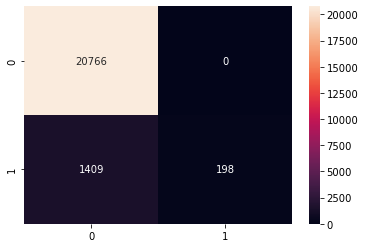

In [183]:
sns.heatmap(matrix,yticklabels=True, annot=True,fmt='d')

In [210]:
# define the stages of the pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps= [('tfid', TfidfVectorizer(
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('NV', MultinomialNB())])

In [211]:
# fit the pipeline model with the training data                            
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(max_features=1000,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
            

In [212]:
#Now, we will test the pipeline with a sample tweet

In [213]:
text = ["good luck team india"]

In [214]:
# predict the label using the pipeline
pipeline.predict(text)
# we can see the result 0 since no hated speech

array([0], dtype=int64)

In [215]:
 from sklearn.naive_bayes import MultinomialNB
NV=MultinomialNB()
NV.fit(df_train_idf,y_train)

MultinomialNB()

In [216]:
predictions = NV.predict(df_test_idf)

In [217]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
predict_train = NV.predict(df_train_idf)

# predict the model on the test data
predict_test = NV.predict(df_test_idf)

In [219]:
f1_train=f1_score(y_train,predict_train)
f1_test=f1_score(y_test,predict_test)

In [220]:
f1_train

0.3207941483803553

In [221]:
f1_test

0.21629213483146065

In [222]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(y_train,predict_train)
print(matrix)
score=accuracy_score(y_test,predict_test)
print(score)
report=classification_report(y_test,predict_test)
print(report)

[[20766     0]
 [ 1300   307]]
0.9418083220356659
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8954
           1       1.00      0.12      0.22       635

    accuracy                           0.94      9589
   macro avg       0.97      0.56      0.59      9589
weighted avg       0.95      0.94      0.92      9589



<AxesSubplot:>

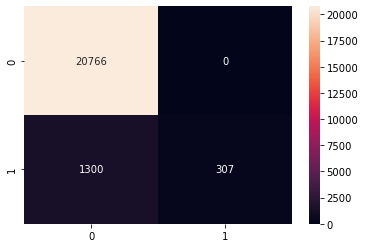

In [223]:
sns.heatmap(matrix,yticklabels=True, annot=True,fmt='d')

<AxesSubplot:>

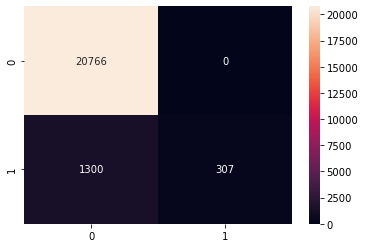

In [224]:
sns.heatmap(matrix,yticklabels=True, annot=True,fmt='d')

In [225]:
df_test.tweet

0        #studiolife #aislife #requires #passion #dedic...
1         @user #white #supremacists want everyone to s...
2        safe ways to heal your #acne!!    #altwaystohe...
3        is the hp and the cursed child book up for res...
4          3rd #bihday to my amazing, hilarious #nephew...
                               ...                        
17192    thought factory: left-right polarisation! #tru...
17193    feeling like a mermaid ð #hairflip #neverre...
17194    #hillary #campaigned today in #ohio((omg)) &am...
17195    happy, at work conference: right mindset leads...
17196    my   song "so glad" free download!  #shoegaze ...
Name: tweet, Length: 17197, dtype: object

In [226]:
tfid.fit(df_test.tweet)

TfidfVectorizer(ngram_range=(2, 2),
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [227]:
df_test1_idf = tfid.transform(df_test.tweet)

In [228]:
df_test1_idf

<17197x89770 sparse matrix of type '<class 'numpy.float64'>'
	with 117568 stored elements in Compressed Sparse Row format>

In [242]:
ypred3=pipeline.predict(df_test.tweet)

In [243]:
ypred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [244]:
dfx=pd.DataFrame(ypred3,columns=['label'])

In [245]:
dfx.value_counts()

label
0        16832
1          365
dtype: int64

In [246]:
subm.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [247]:
subm['label']=dfx['label']

In [248]:

subm.to_csv('G:/Twitter analysis/submitted.csv',index=False)

In [249]:
d=pd.read_csv('G:/Twitter analysis/submitted.csv')